In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("water_potability.csv")
data = data.sample(frac = 1)
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  \
570   7.785107  174.889361  13404.254332     7.517806         NaN   
1107  6.799376  239.057680   7986.493239    10.365680  419.881175   
374   8.882684  135.523062   4857.253807     5.209779         NaN   
1437       NaN  215.750221  36776.137499     6.669057  294.111044   
2555  5.681811  151.085937  26373.495428     5.651589         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
570     491.431722       13.825548        75.059426   4.904613           0  
1107    373.232137       18.828594        43.440644   3.819985           1  
374     532.336659       20.296274        20.337753   3.827921           1  
1437    489.885871       11.180350              NaN   4.754313           0  
2555    468.472601        8.623795       102.246447   5.375157           0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 570 to 2985
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [6]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
data['ph'].fillna(data['ph'].mean(), inplace = True)

In [9]:
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace = True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace = True)

In [10]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
data.describe().T

count          mean          std         min           25%  \
ph               3276.0      7.080795     1.469956    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.775777    36.142612  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.396293    15.769881    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.080795      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.775777    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.396293     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

<AxesSubplot:ylabel='count'>

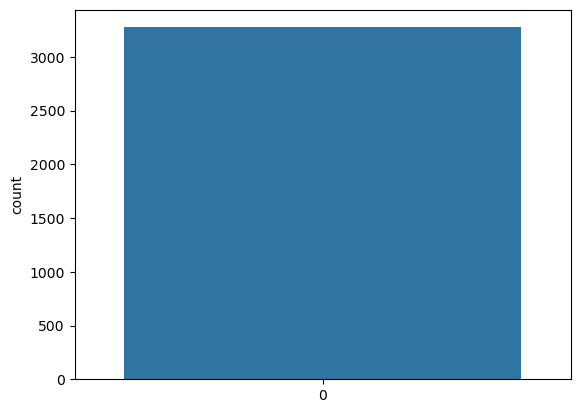

In [12]:
sns.countplot(data['Potability'])

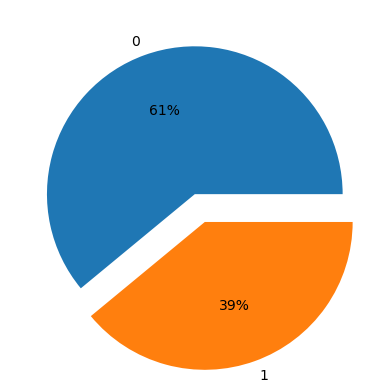

In [13]:
plt.pie(data['Potability'].value_counts(), labels = [0,1], explode = [0,0.2], autopct="%.0f%%")
plt.show()

In [14]:
plt.rcParams['figure.figsize'] = (10,4)

<AxesSubplot:xlabel='ph'>

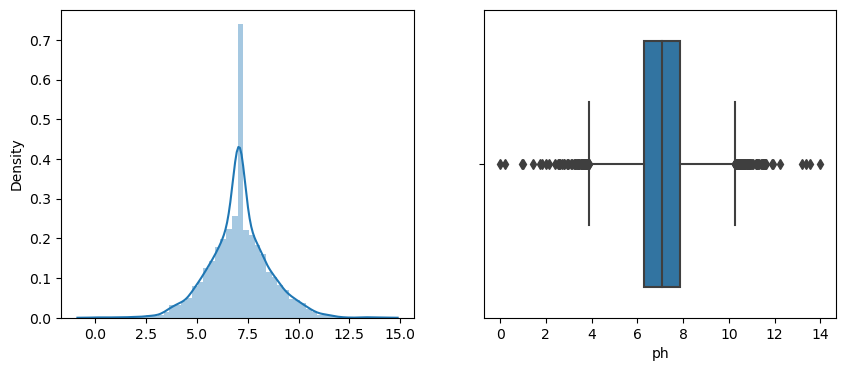

In [15]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['ph'], kde = True, ax = axes[0])
sns.boxplot(x = data['ph'], ax = axes[1])

<AxesSubplot:xlabel='Hardness'>

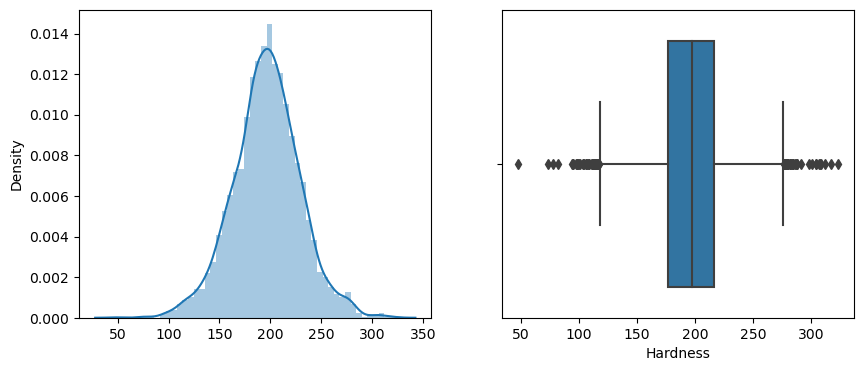

In [16]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Hardness'], kde = True, ax = axes[0])
sns.boxplot(x = data['Hardness'], ax = axes[1])

<AxesSubplot:xlabel='Solids'>

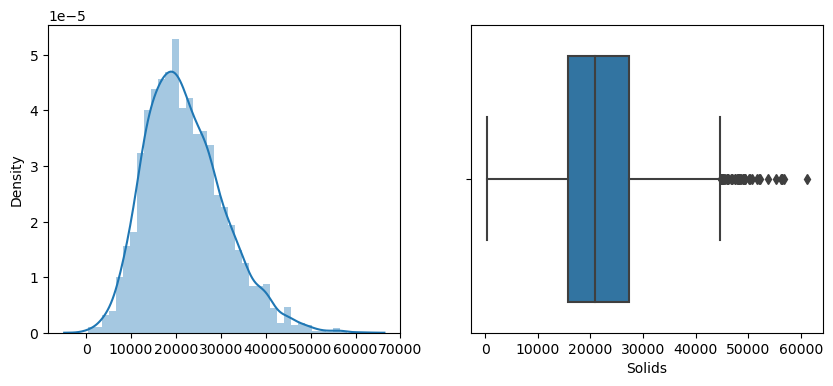

In [17]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Solids'], kde = True, ax = axes[0])
sns.boxplot(x = data['Solids'], ax = axes[1])

<AxesSubplot:xlabel='Chloramines'>

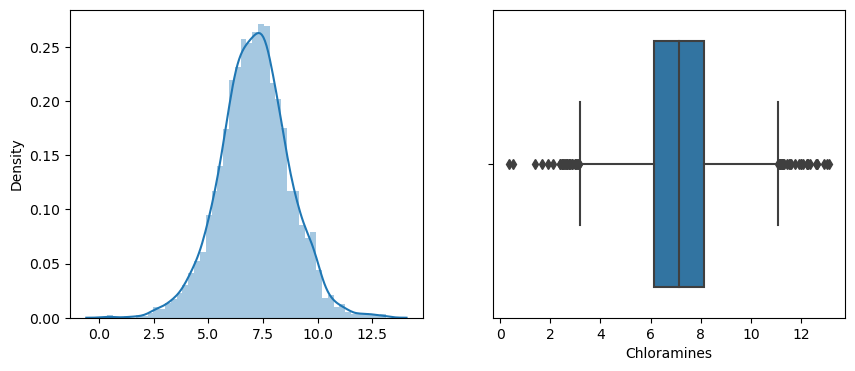

In [18]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Chloramines'], kde = True, ax = axes[0])
sns.boxplot(x = data['Chloramines'], ax = axes[1])

<AxesSubplot:xlabel='Chloramines'>

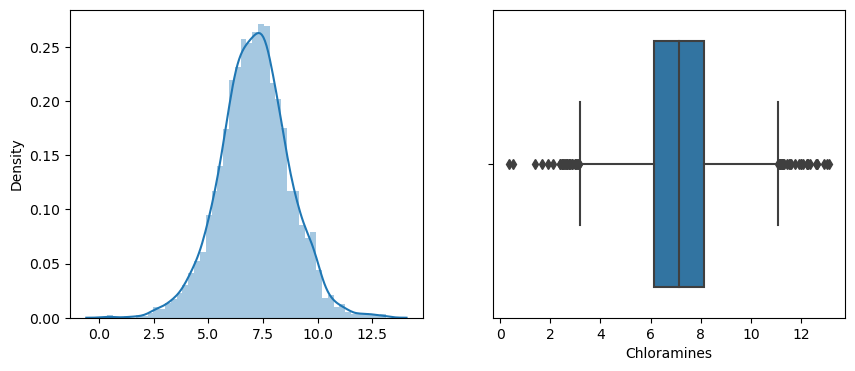

In [19]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Chloramines'], kde = True, ax = axes[0])
sns.boxplot(x = data['Chloramines'], ax = axes[1])

<AxesSubplot:xlabel='Sulfate'>

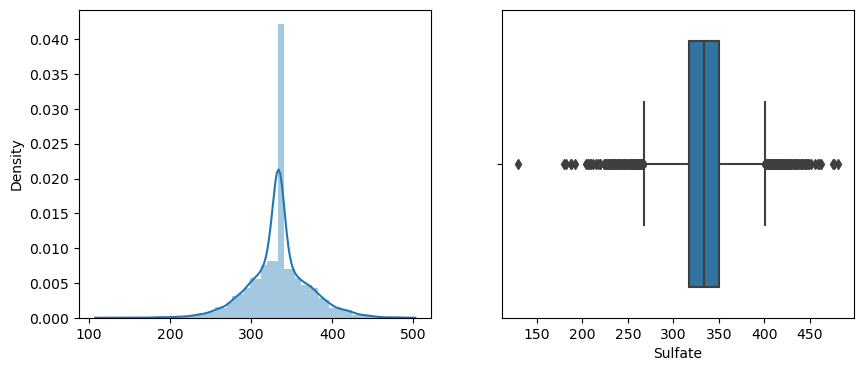

In [20]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Sulfate'], kde = True, ax = axes[0])
sns.boxplot(x = data['Sulfate'], ax = axes[1])

<AxesSubplot:xlabel='Conductivity'>

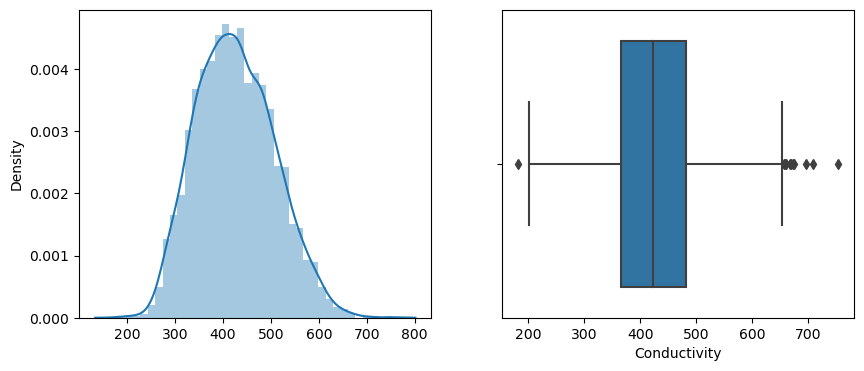

In [21]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Conductivity'], kde = True, ax = axes[0])
sns.boxplot(x = data['Conductivity'], ax = axes[1])

<AxesSubplot:xlabel='Organic_carbon'>

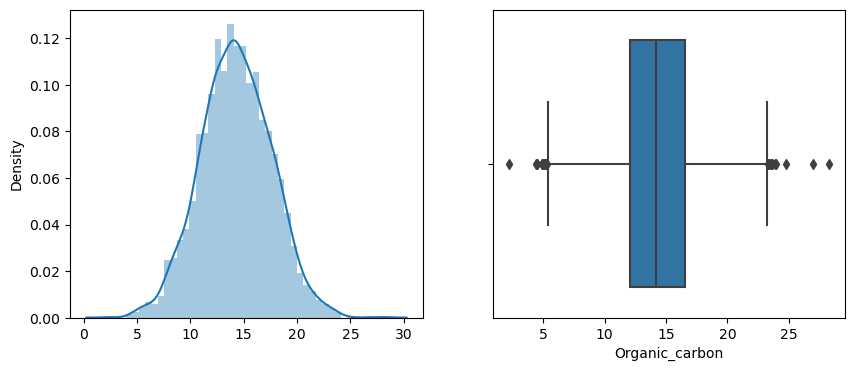

In [22]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Organic_carbon'], kde = True, ax = axes[0])
sns.boxplot(x = data['Organic_carbon'], ax = axes[1])

<AxesSubplot:xlabel='Trihalomethanes'>

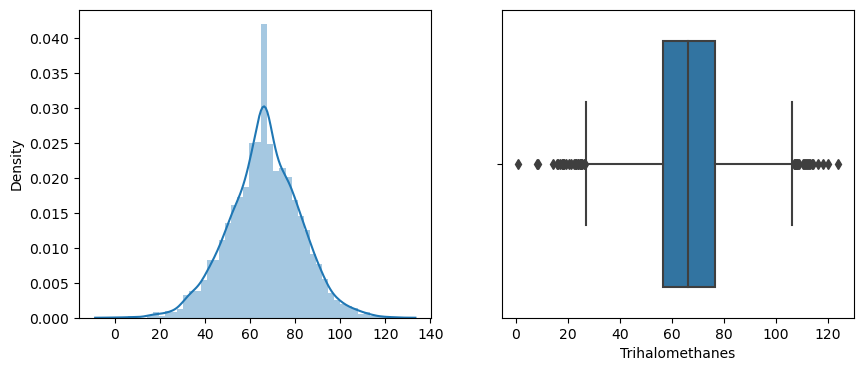

In [23]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Trihalomethanes'], kde = True, ax = axes[0])
sns.boxplot(x = data['Trihalomethanes'], ax = axes[1])

<AxesSubplot:xlabel='Turbidity'>

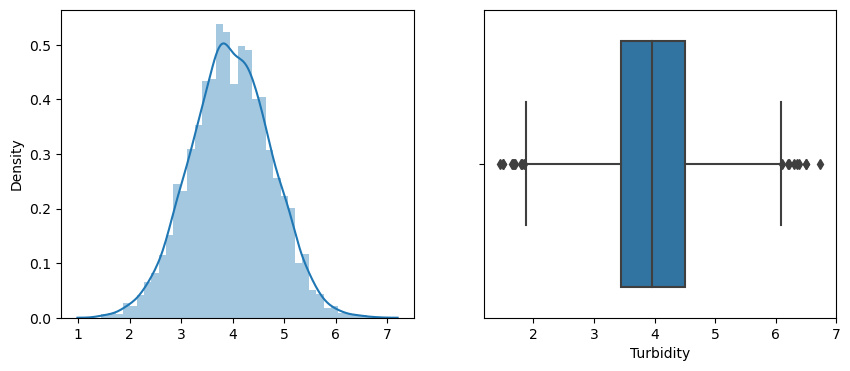

In [24]:
fig, axes = plt.subplots(1,2)
sns.distplot(x = data['Turbidity'], kde = True, ax = axes[0])
sns.boxplot(x = data['Turbidity'], ax = axes[1])

In [25]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='Potability', ylabel='ph'>

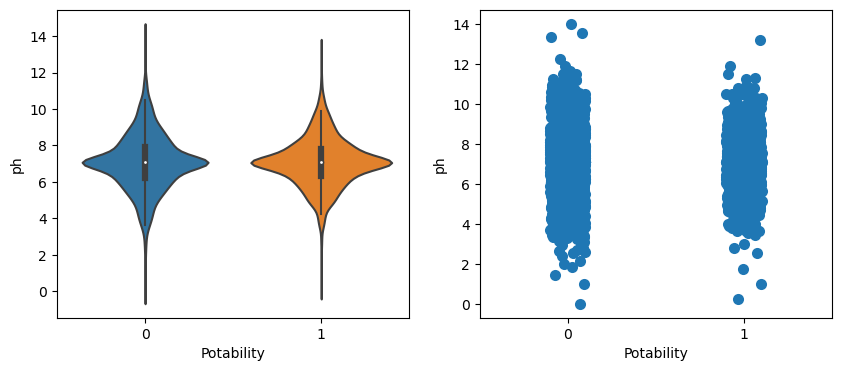

In [26]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'ph', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'ph', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

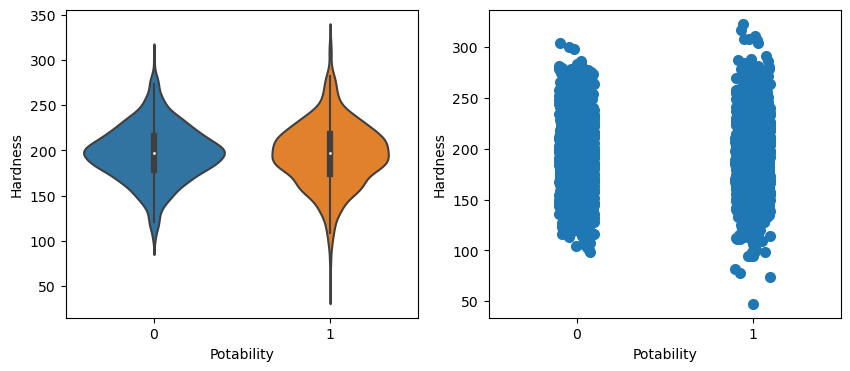

In [27]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Hardness', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Hardness', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

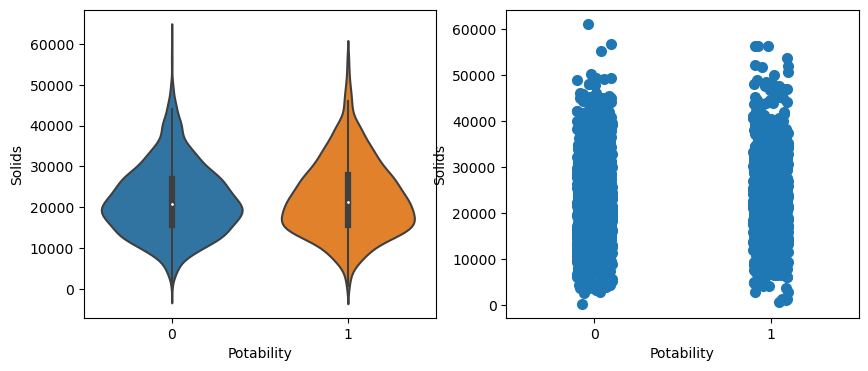

In [28]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Solids', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Solids', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

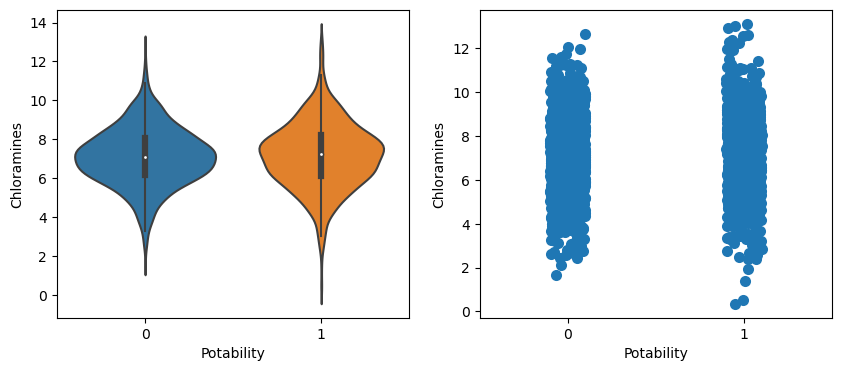

In [29]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Chloramines', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Chloramines', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

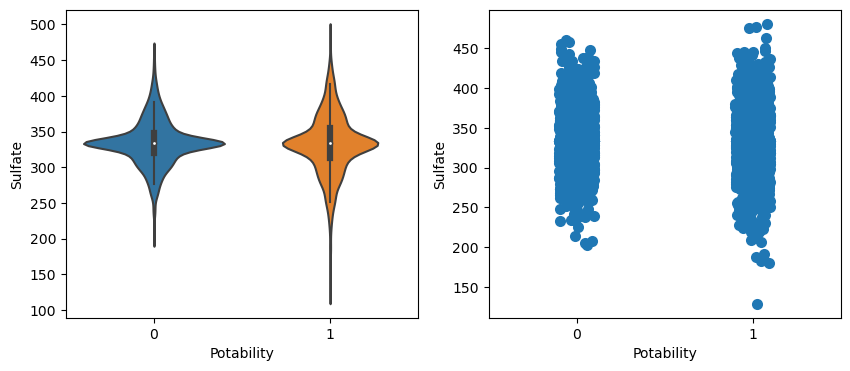

In [30]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Sulfate', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Sulfate', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

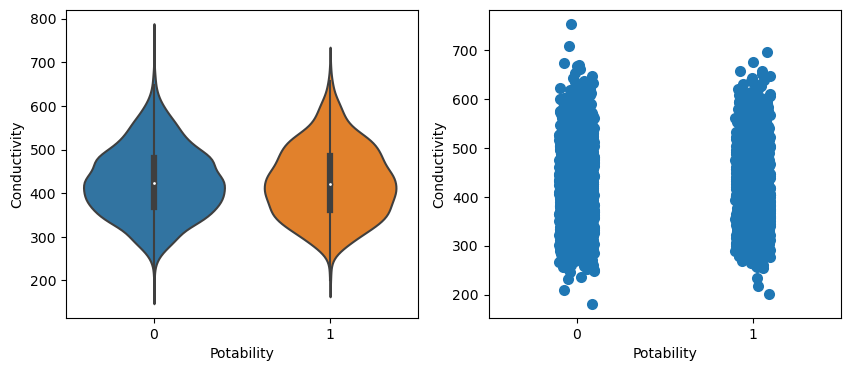

In [31]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Conductivity', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Conductivity', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

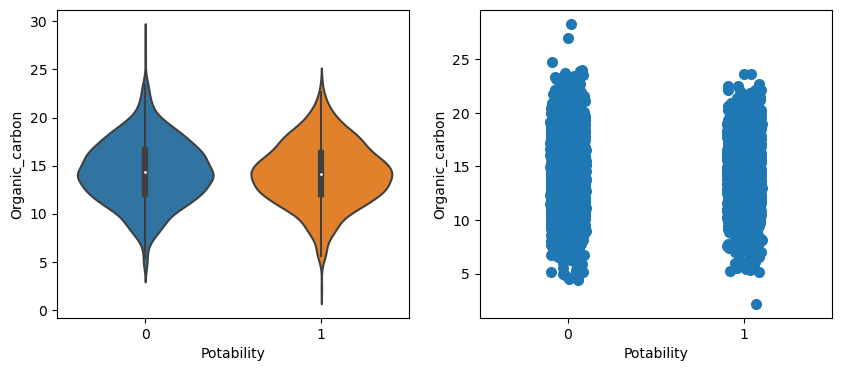

In [32]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Organic_carbon', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Organic_carbon', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

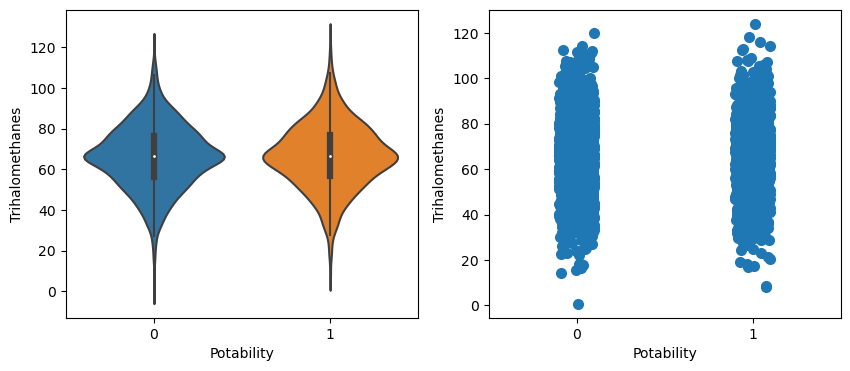

In [33]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Trihalomethanes', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Trihalomethanes', x = 'Potability', size = 8, ax = axes[1])

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

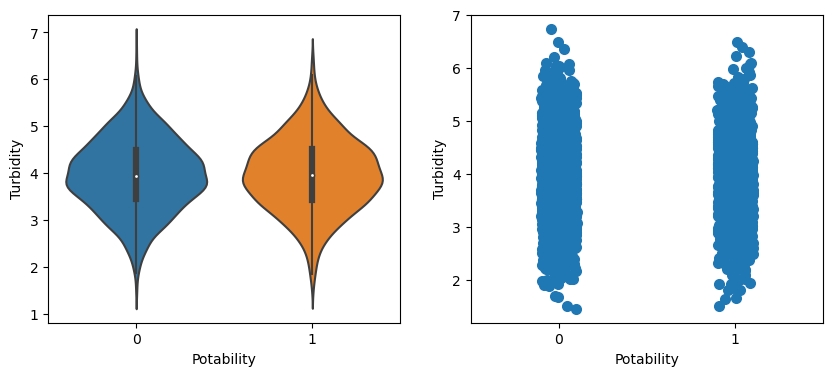

In [34]:
fig, axes = plt.subplots(1,2)
sns.violinplot(data = data,  y = 'Turbidity', x = 'Potability', size = 8, ax = axes[0])
sns.stripplot(data = data,  y = 'Turbidity', x = 'Potability', size = 8, ax = axes[1])

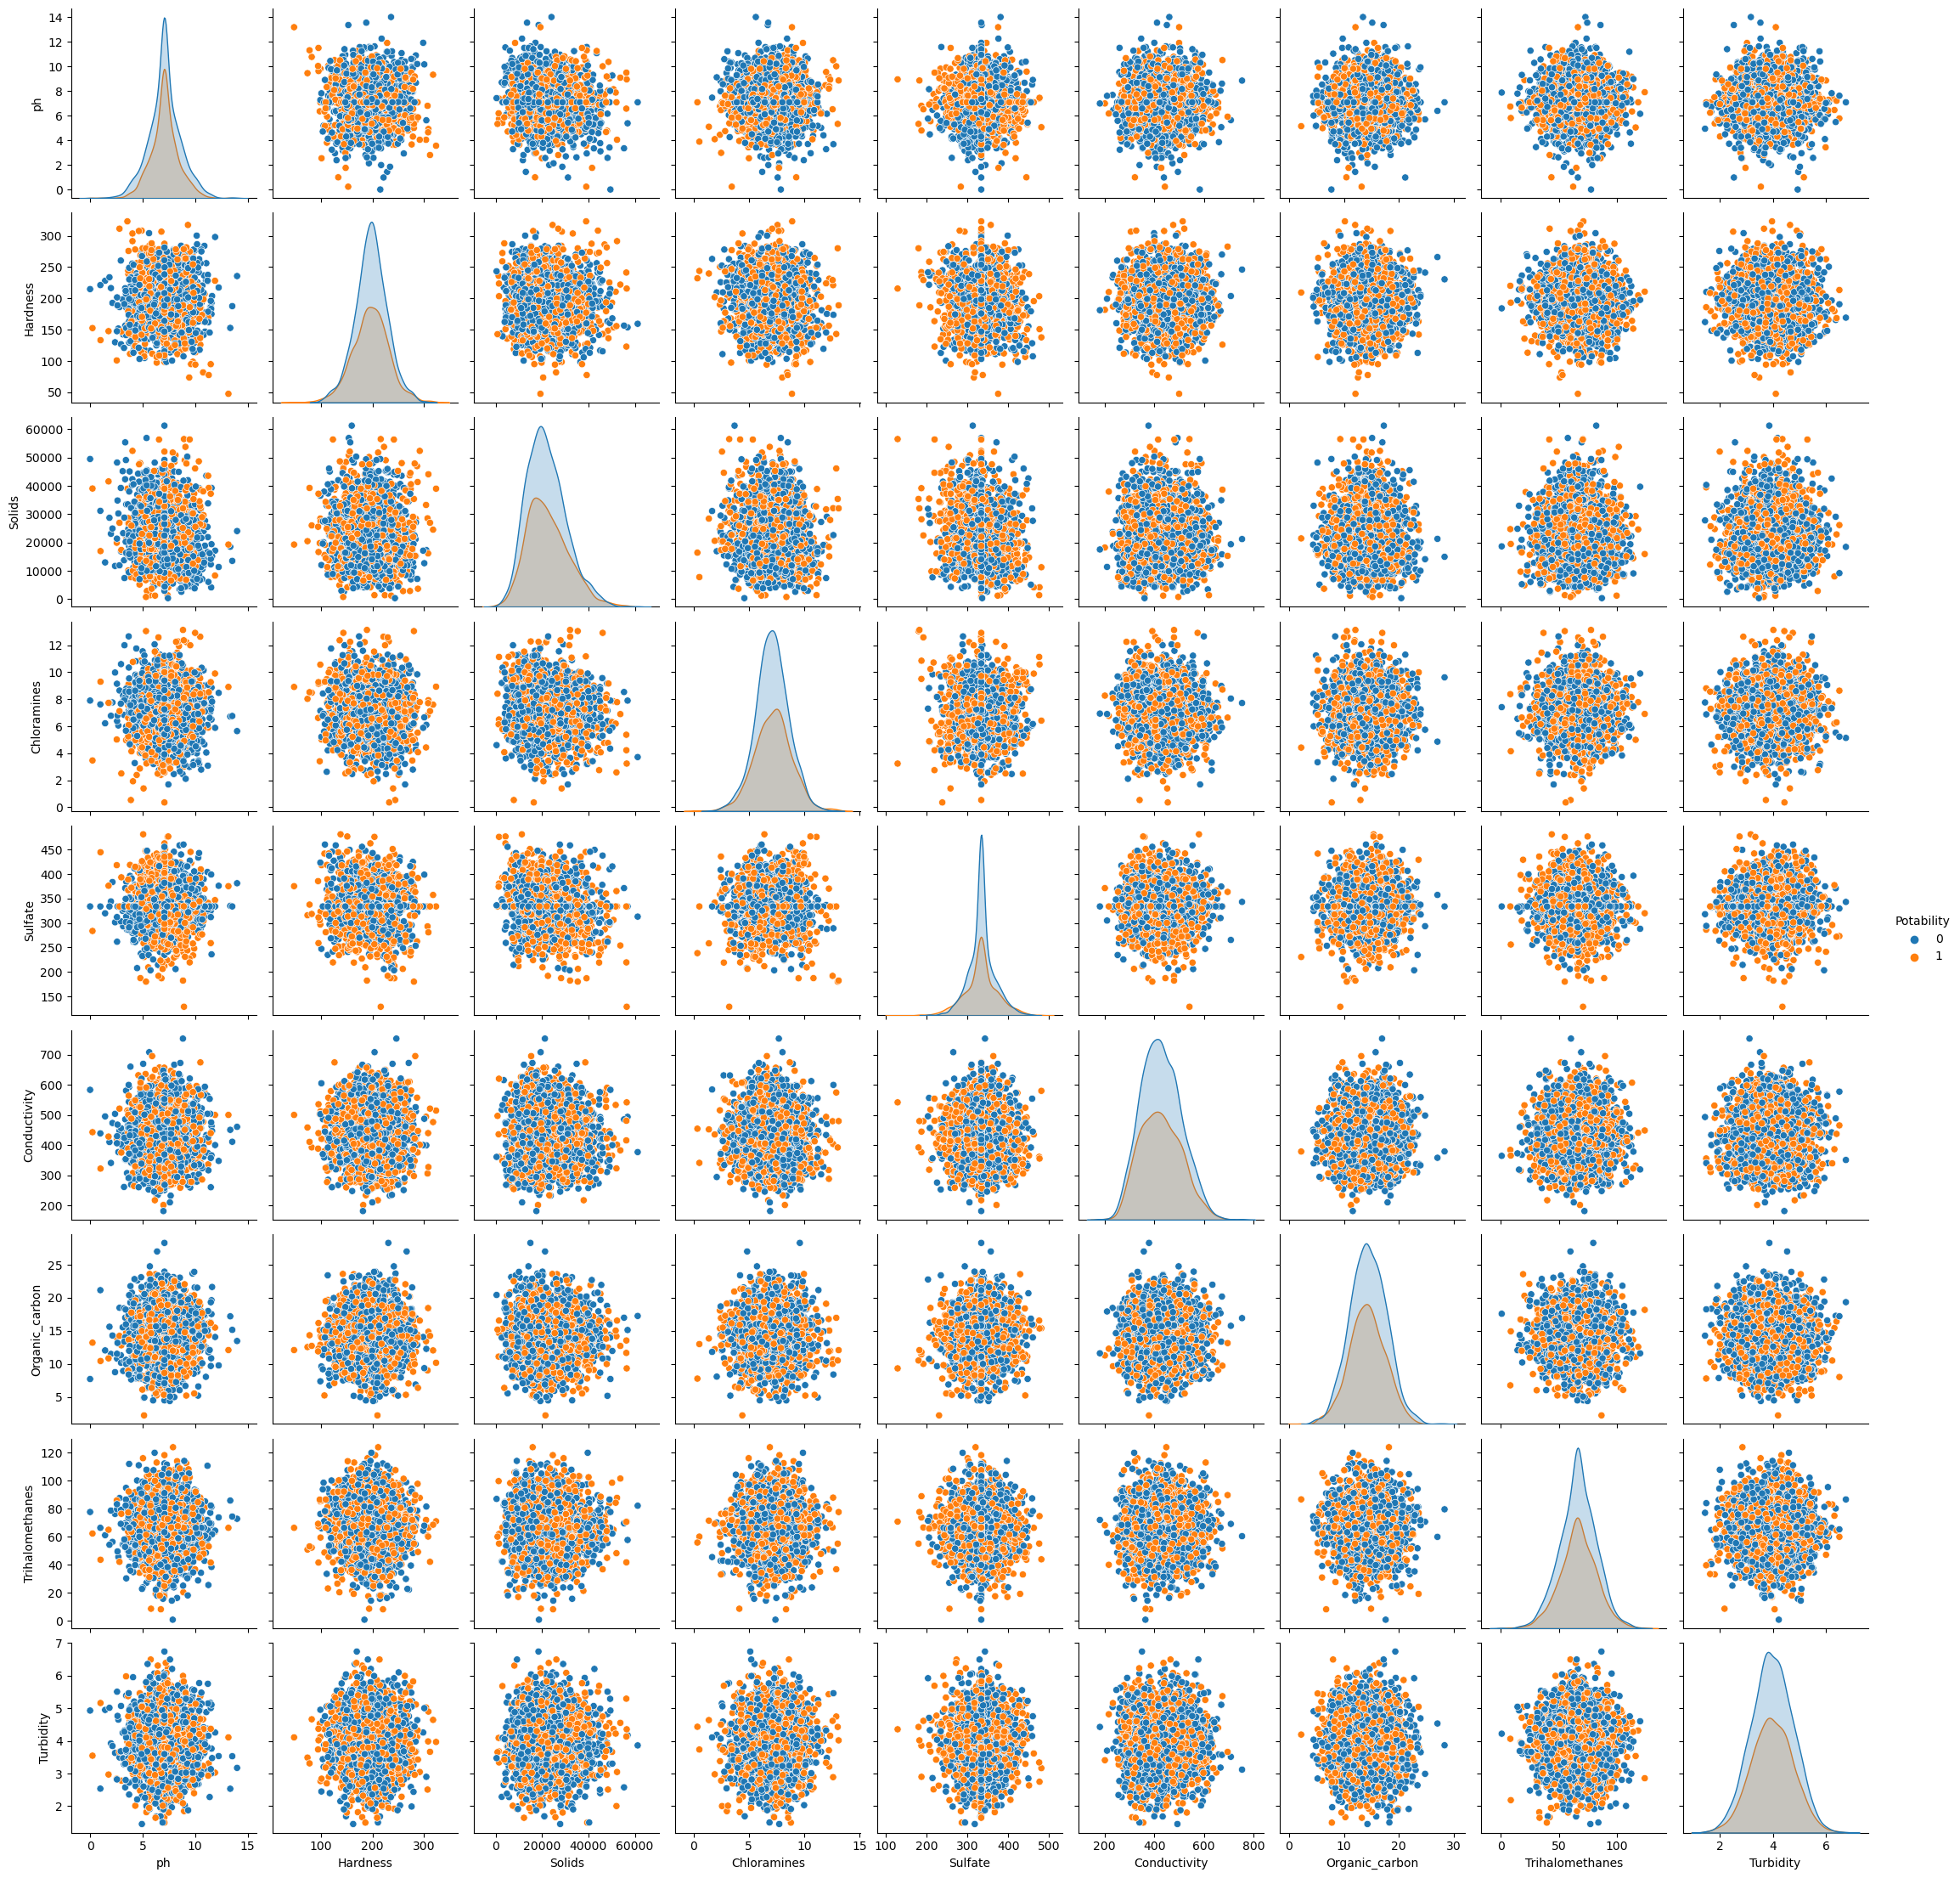

In [35]:
sns.pairplot(data, hue = 'Potability')

In [36]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [37]:
ph_lower = np.percentile(data['ph'], [1])
ph_upper = np.percentile(data['ph'], [99])
data['ph'][data['ph'].values < ph_lower] = ph_lower
data['ph'][data['ph'].values > ph_upper] = ph_upper

# Hardness
lower = np.percentile(data['Hardness'], [1])
upper = np.percentile(data['Hardness'], [99])
data['Hardness'][data['Hardness'].values < lower] = lower
data['Hardness'][data['Hardness'].values > upper] = upper

# Solids
lower = np.percentile(data['Solids'], [1])
upper = np.percentile(data['Solids'], [99])
data['Solids'][data['Solids'].values < lower] = lower
data['Solids'][data['Solids'].values > upper] = upper

# Chloramines
lower = np.percentile(data['Chloramines'], [1])
upper = np.percentile(data['Chloramines'], [99])
data['Chloramines'][data['Chloramines'].values < lower] = lower
data['Chloramines'][data['Chloramines'].values > upper] = upper

# Sulfate
lower = np.percentile(data['Sulfate'], [1])
upper = np.percentile(data['Sulfate'], [99])
data['Sulfate'][data['Sulfate'].values < lower] = lower
data['Sulfate'][data['Sulfate'].values > upper] = upper

# Conductivity
lower = np.percentile(data['Conductivity'], [1])
upper = np.percentile(data['Conductivity'], [99])
data['Conductivity'][data['Conductivity'].values < lower] = lower
data['Conductivity'][data['Conductivity'].values > upper] = upper

# Organic_carbon
lower = np.percentile(data['Organic_carbon'], [1])
upper = np.percentile(data['Organic_carbon'], [99])
data['Organic_carbon'][data['Organic_carbon'].values < lower] = lower
data['Organic_carbon'][data['Organic_carbon'].values > upper] = upper

# Trihalomethanes
lower = np.percentile(data['Trihalomethanes'], [1])
upper = np.percentile(data['Trihalomethanes'], [99])
data['Trihalomethanes'][data['Trihalomethanes'].values < lower] = lower
data['Trihalomethanes'][data['Trihalomethanes'].values > upper] = upper

# Turbidity
lower = np.percentile(data['Turbidity'], [1])
upper = np.percentile(data['Turbidity'], [99])
data['Turbidity'][data['Turbidity'].values < lower] = lower
data['Turbidity'][data['Turbidity'].values > upper] = upper

ValueError: cannot set using a list-like indexer with a different length than the value

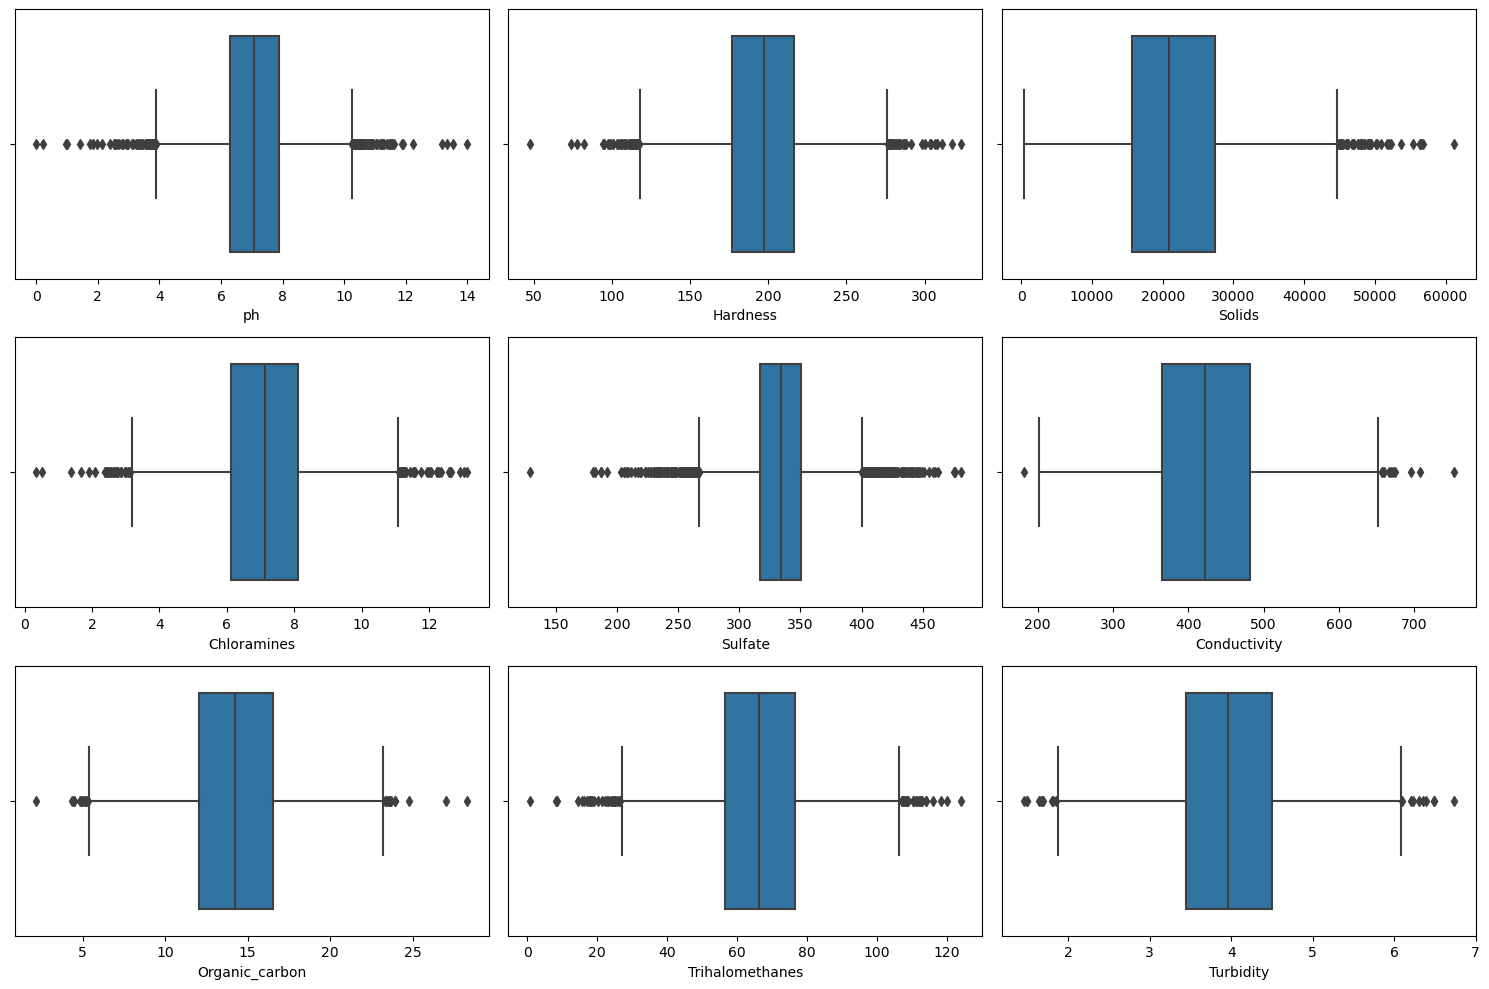

In [38]:
plt.figure(figsize = (15,10), tight_layout = True)
for i, feature in enumerate(data.columns):
    if feature != 'Potability':
        plt.subplot(3,3,i+1)
        sns.boxplot(data = data, x =feature)

<AxesSubplot:>

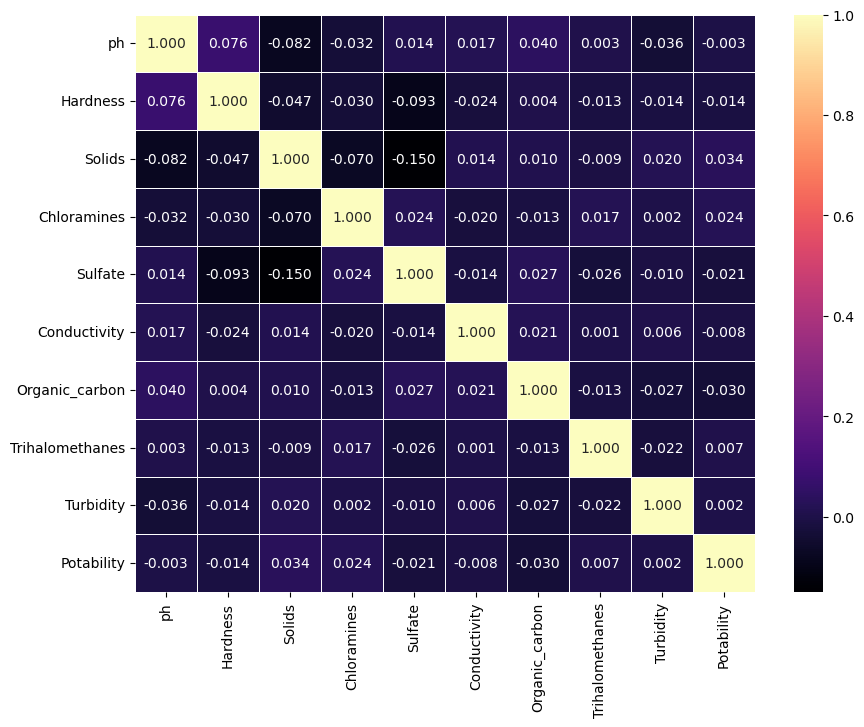

In [39]:
plt.rcParams['figure.figsize']  = (10,7.5)
matrix = data.corr()
sns.heatmap(matrix, fmt = ".3f", linewidths = 0.7, cmap = "magma" ,annot = True)

In [40]:
X = data.drop(['Potability'], axis = 1)
Y = data['Potability']

# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBRegressor

In [43]:
svc_model = SVC(kernel = 'rbf')
svc_model.fit(xtrain, ytrain)

SVC()

In [44]:
ypred = svc_model.predict(xtest)
print(f'Model Score: {svc_model.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}')

Model Score: 0.6753048780487805
Accuracy Score: 0.6753048780487805
Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.96      0.78       391
           1       0.82      0.25      0.39       265

    accuracy                           0.68       656
   macro avg       0.74      0.61      0.58       656
weighted avg       0.72      0.68      0.62       656



In [45]:
param_grid = {'C' : (np.arange(0.1,1,0.1)) , 'kernel' : ['linear'],
              'C' : (np.arange(0.1,1,0.1)), 'gamma' : [0.1,0.2,0.3,0.4,0.5], 'kernel' : ['rbf'],
              'C' : (np.arange(0.1,1,0.1)), 'gamma' : [0.1,0.2,0.3,0.4,0.5], 'degree' : [2,3,4], 'kernel' : ['poly']}

In [ ]:
model = SVC()
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(xtrain, ytrain)

In [ ]:
grid_search.best_params_

In [ ]:
ypred = grid_search.predict(xtest)
print(f'Model Score: {grid_search.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}')

In [ ]:
matrix = confusion_matrix(ytest, ypred)
matrix

In [ ]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth = 9, 
                               max_features = 7)
model.fit(xtrain, ytrain)

In [ ]:
ypred = model.predict(xtest)
print(f'Model Score: {model.score(xtest,ytest)}')
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}\n')
print(f'Confusion Matrix \n {confusion_matrix(ytest, ypred)}')

In [ ]:
model = XGBRegressor()
model.fit(xtrain, ytrain)

In [ ]:
ypred = model.predict(xtest)
ypred = [ 1 if y>=0.5 else 0 for y in ypred ]
print(f'Accuracy Score: {accuracy_score(ytest, ypred)}')
print(f'Classification Report \n {classification_report(ytest, ypred)}\n')
print(f'Confusion Matrix \n {confusion_matrix(ytest, ypred)}')